In [185]:
import numpy as np
import pandas as pd
df = pd.read_csv("day.csv", index_col = False)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [186]:
df.shape

(730, 16)

In [187]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [188]:
df = df.drop(['instant', 'dteday'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
#dropping casual and registered column since total count is already given
df = df.drop(['casual', 'registered'] , axis = 1)

In [190]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [191]:
#checking for any missing values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#hence there are no missing values in the dataset.


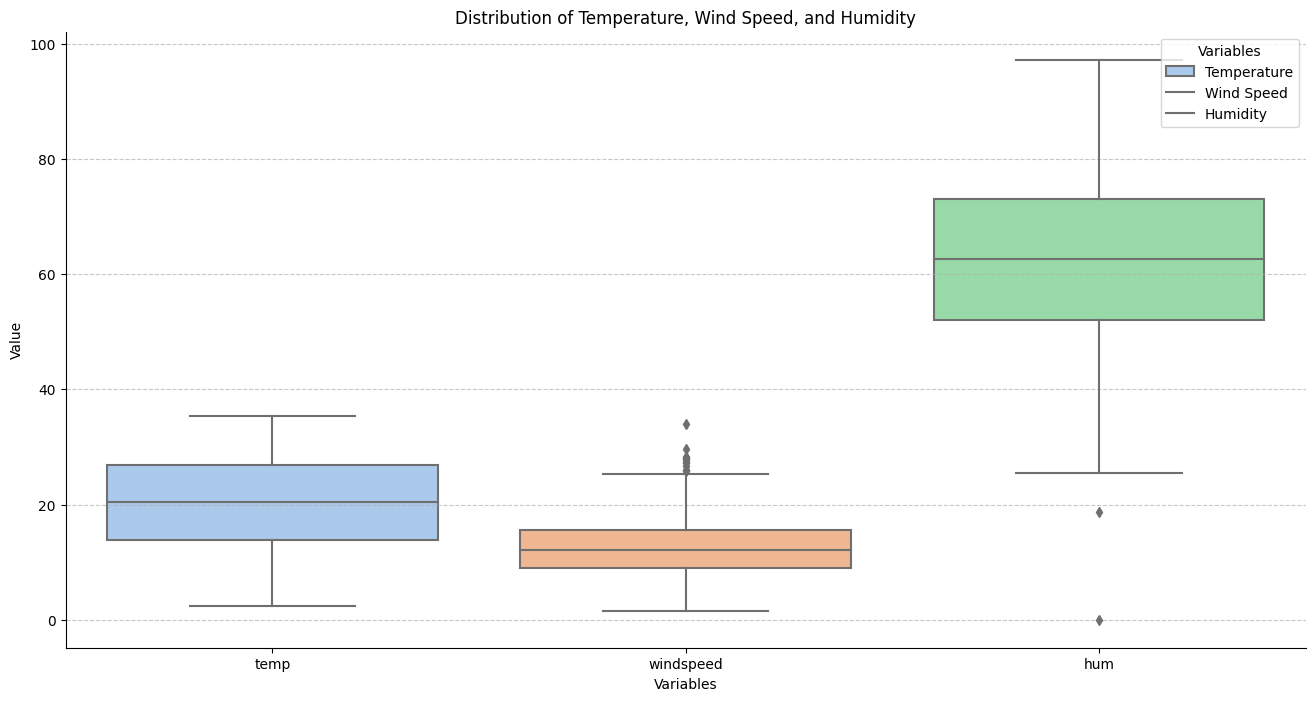

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
#outlier handling
fig, ax = plt.subplots(figsize=(16, 8))

# Set a custom color palette for the boxplot
custom_palette = sns.color_palette("pastel")

# Box plot for temperature, wind speed, and humidity
sns.boxplot(data=df[['temp', 'windspeed', 'hum']], palette=custom_palette)

# Adding title and labels
ax.set_title('Distribution of Temperature, Wind Speed, and Humidity')
ax.set_xlabel('Variables')
ax.set_ylabel('Value')

# Adding a legend with meaningful labels
variables_legend_labels = ['Temperature', 'Wind Speed', 'Humidity']
ax.legend(variables_legend_labels, title='Variables', loc='upper right')

# Adding a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Removing the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [193]:
#create dataframe for outliers
wind_hum=pd.DataFrame(df,columns=['windspeed','hum'])
 #Cnames for outliers
cnames=['windspeed','hum']

for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    max=q75+(iqr*1.5) #outer fence
    min=q25-(iqr*1.5) #inner fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
#wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())
#wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
#Replacing the imputated humidity
#df['hum']=df['hum'].replace(wind_hum['hum'])
#Replacing the imputated windspeed
#f['windspeed']=df['windspeed'].replace(wind_hum['windspeed'])
wind_hum.isnull().sum()

windspeed    14
hum           2
dtype: int64

In [194]:
wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum.isnull().sum()

windspeed    0
hum          0
dtype: int64

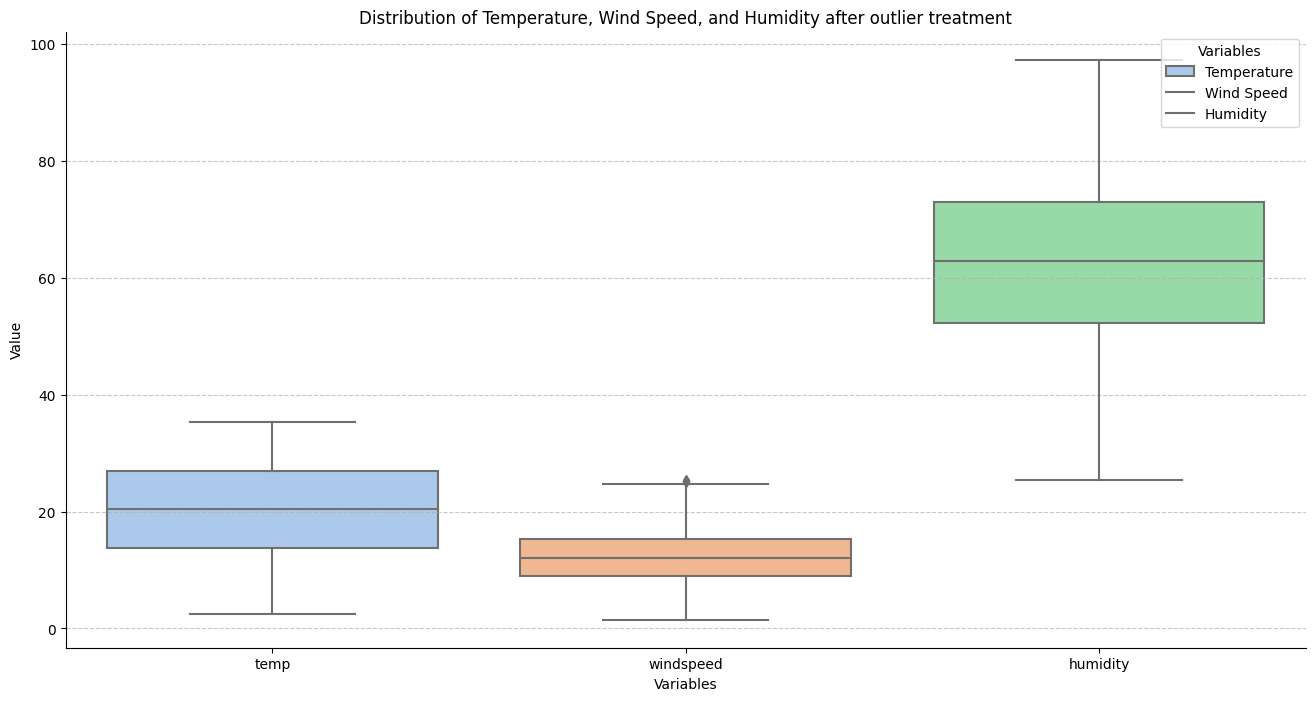

In [195]:
df['humidity']= (wind_hum['hum'])
#Replacing the imputated windspeed
df['windspeed']=(wind_hum['windspeed'])
import matplotlib.pyplot as plt
import seaborn as sns
#outlier handling
fig, ax = plt.subplots(figsize=(16, 8))

# Set a custom color palette for the boxplot
custom_palette = sns.color_palette("pastel")

# Box plot for temperature, wind speed, and humidity
sns.boxplot(data=df[['temp', 'windspeed', 'humidity']], palette=custom_palette)

# Adding title and labels
ax.set_title('Distribution of Temperature, Wind Speed, and Humidity after outlier treatment')
ax.set_xlabel('Variables')
ax.set_ylabel('Value')

# Adding a legend with meaningful labels
variables_legend_labels = ['Temperature', 'Wind Speed', 'Humidity']
ax.legend(variables_legend_labels, title='Variables', loc='upper right')

# Adding a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Removing the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [196]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [197]:
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [198]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [199]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [200]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'humidity'],
      dtype='object')

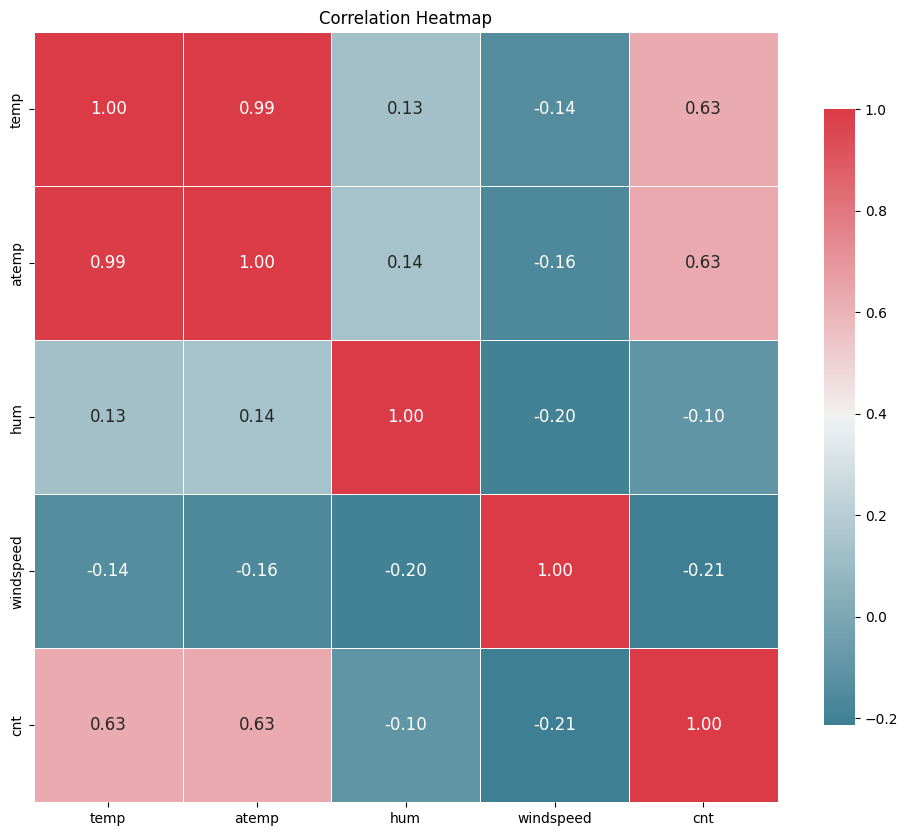

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Set a diverging color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a figure and axis
plt.figure(figsize=(12, 10))

# Generate the heatmap with customizations
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show correlation values
    cmap=cmap,               # Use the custom color palette
    fmt=".2f",               # Format values as two decimal places
    linewidths=0.5,          # Add white lines between cells for clarity
    annot_kws={"size": 12},  # Set annotation font size
    cbar_kws={"shrink": 0.8} # Customize colorbar size
)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


##Hence it can be concluded that temp and atemp are highly correlated with target variable "cnt"
##temp and atemp are highly correlated to each other and we need to drop any one of them.
```



<Figure size 1500x3000 with 0 Axes>

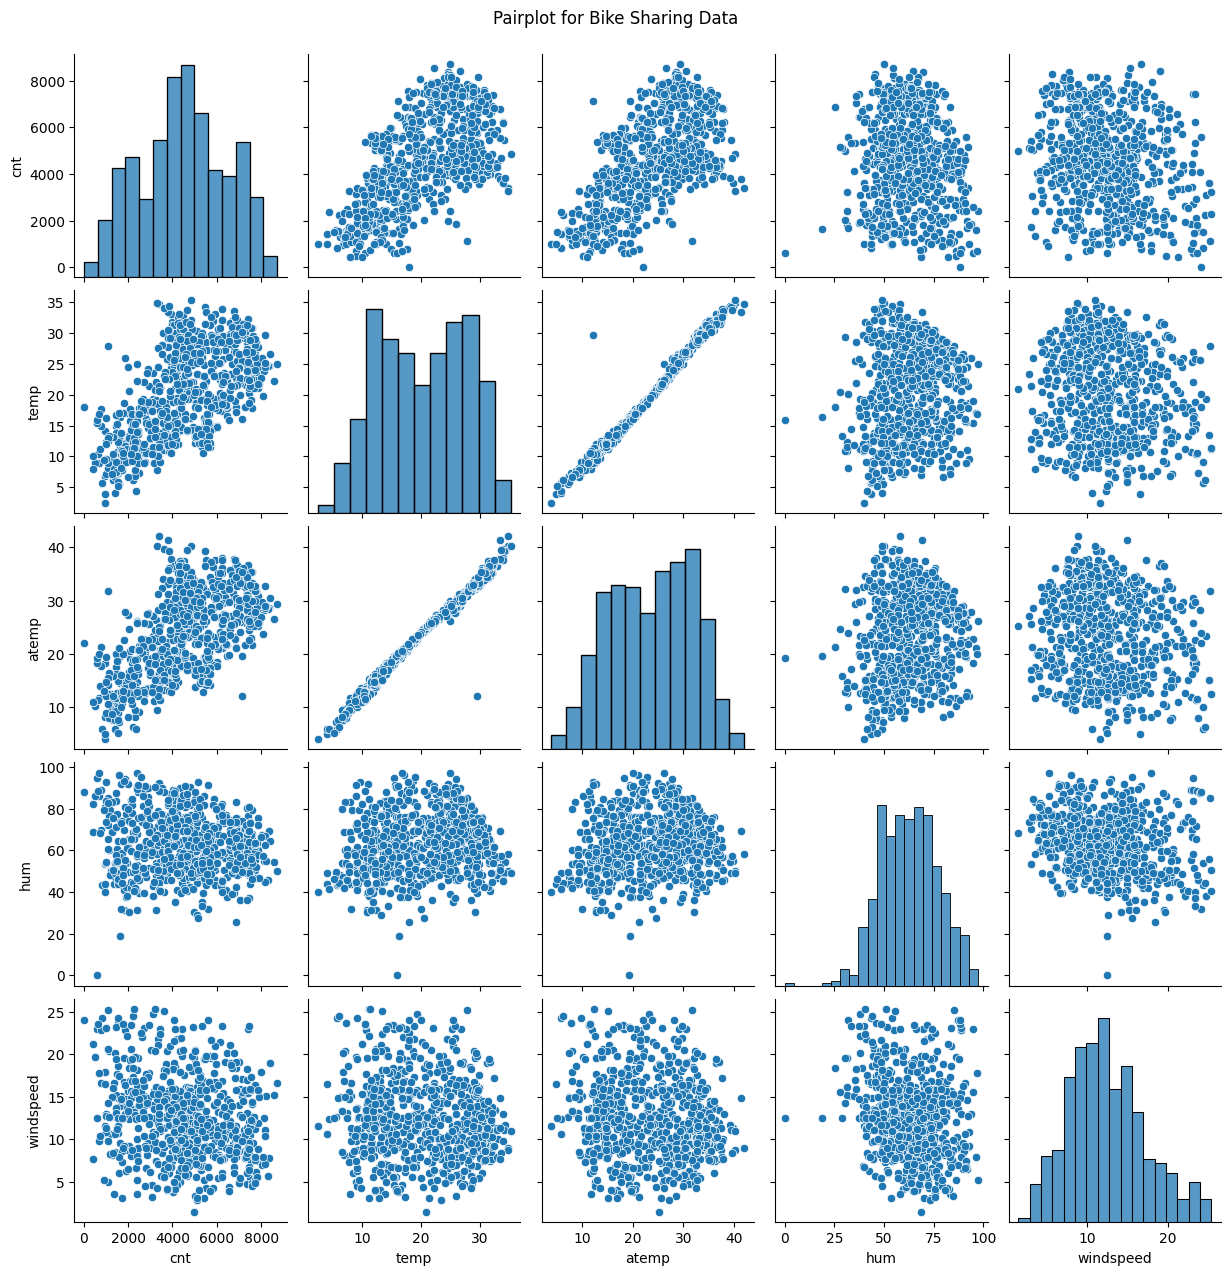

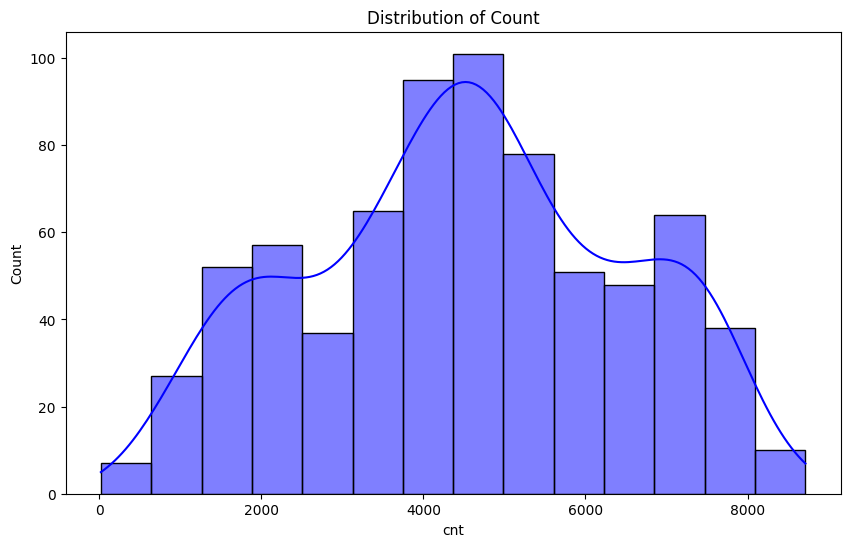

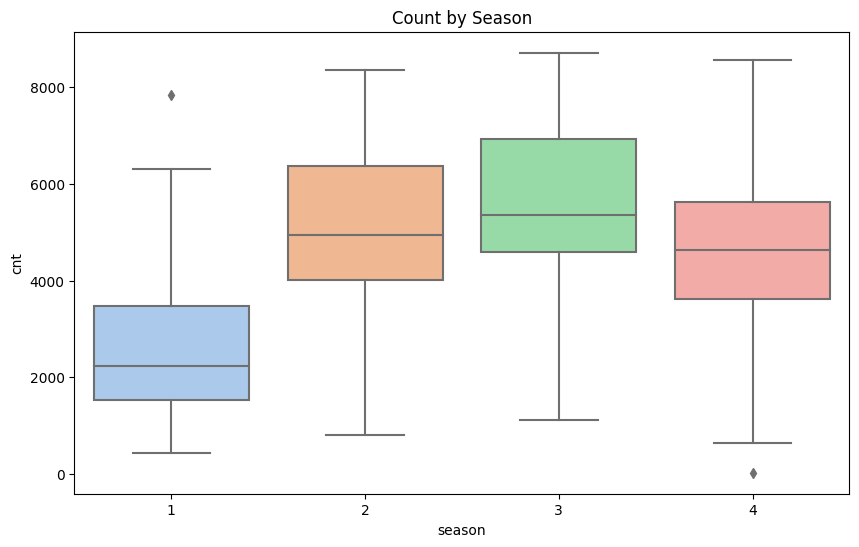

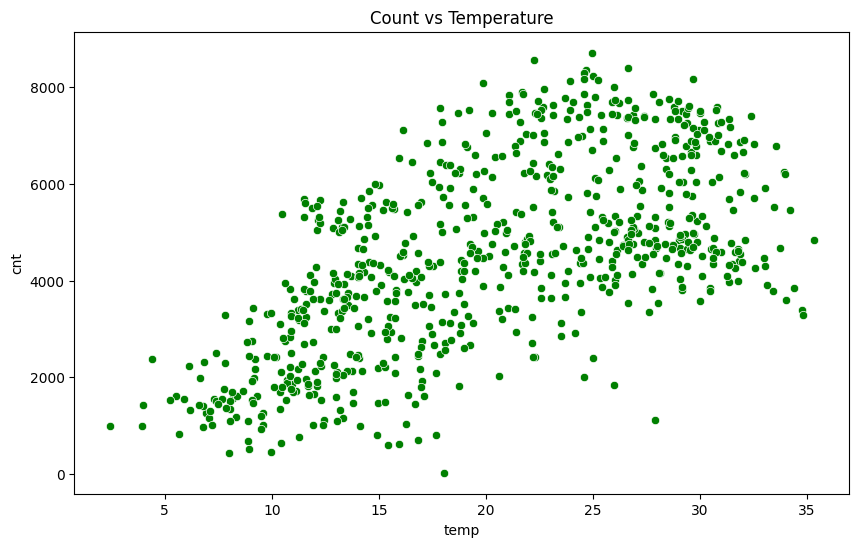

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize=(15, 30))
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.suptitle('Pairplot for Bike Sharing Data', y=1.02)  # Set a title
plt.show()


# Visualize the distribution of count (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, color='blue')
plt.title('Distribution of Count')
plt.show()

# Box plot for count by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='pastel')
plt.title('Count by Season')
plt.show()

# Scatter plot for count vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='green')
plt.title('Count vs Temperature')
plt.show()


#INFERENCES:
##1. we can see that temp and atemp is linearly related with the target variable "cnt"
##2.if we see the distribution of target variable cnt we can see that approximately 100 datas are there with 5000 number of registered bikes .
##3. from the plot of count versus season , it is evident that maximum number of registered bikes occur during winter season.



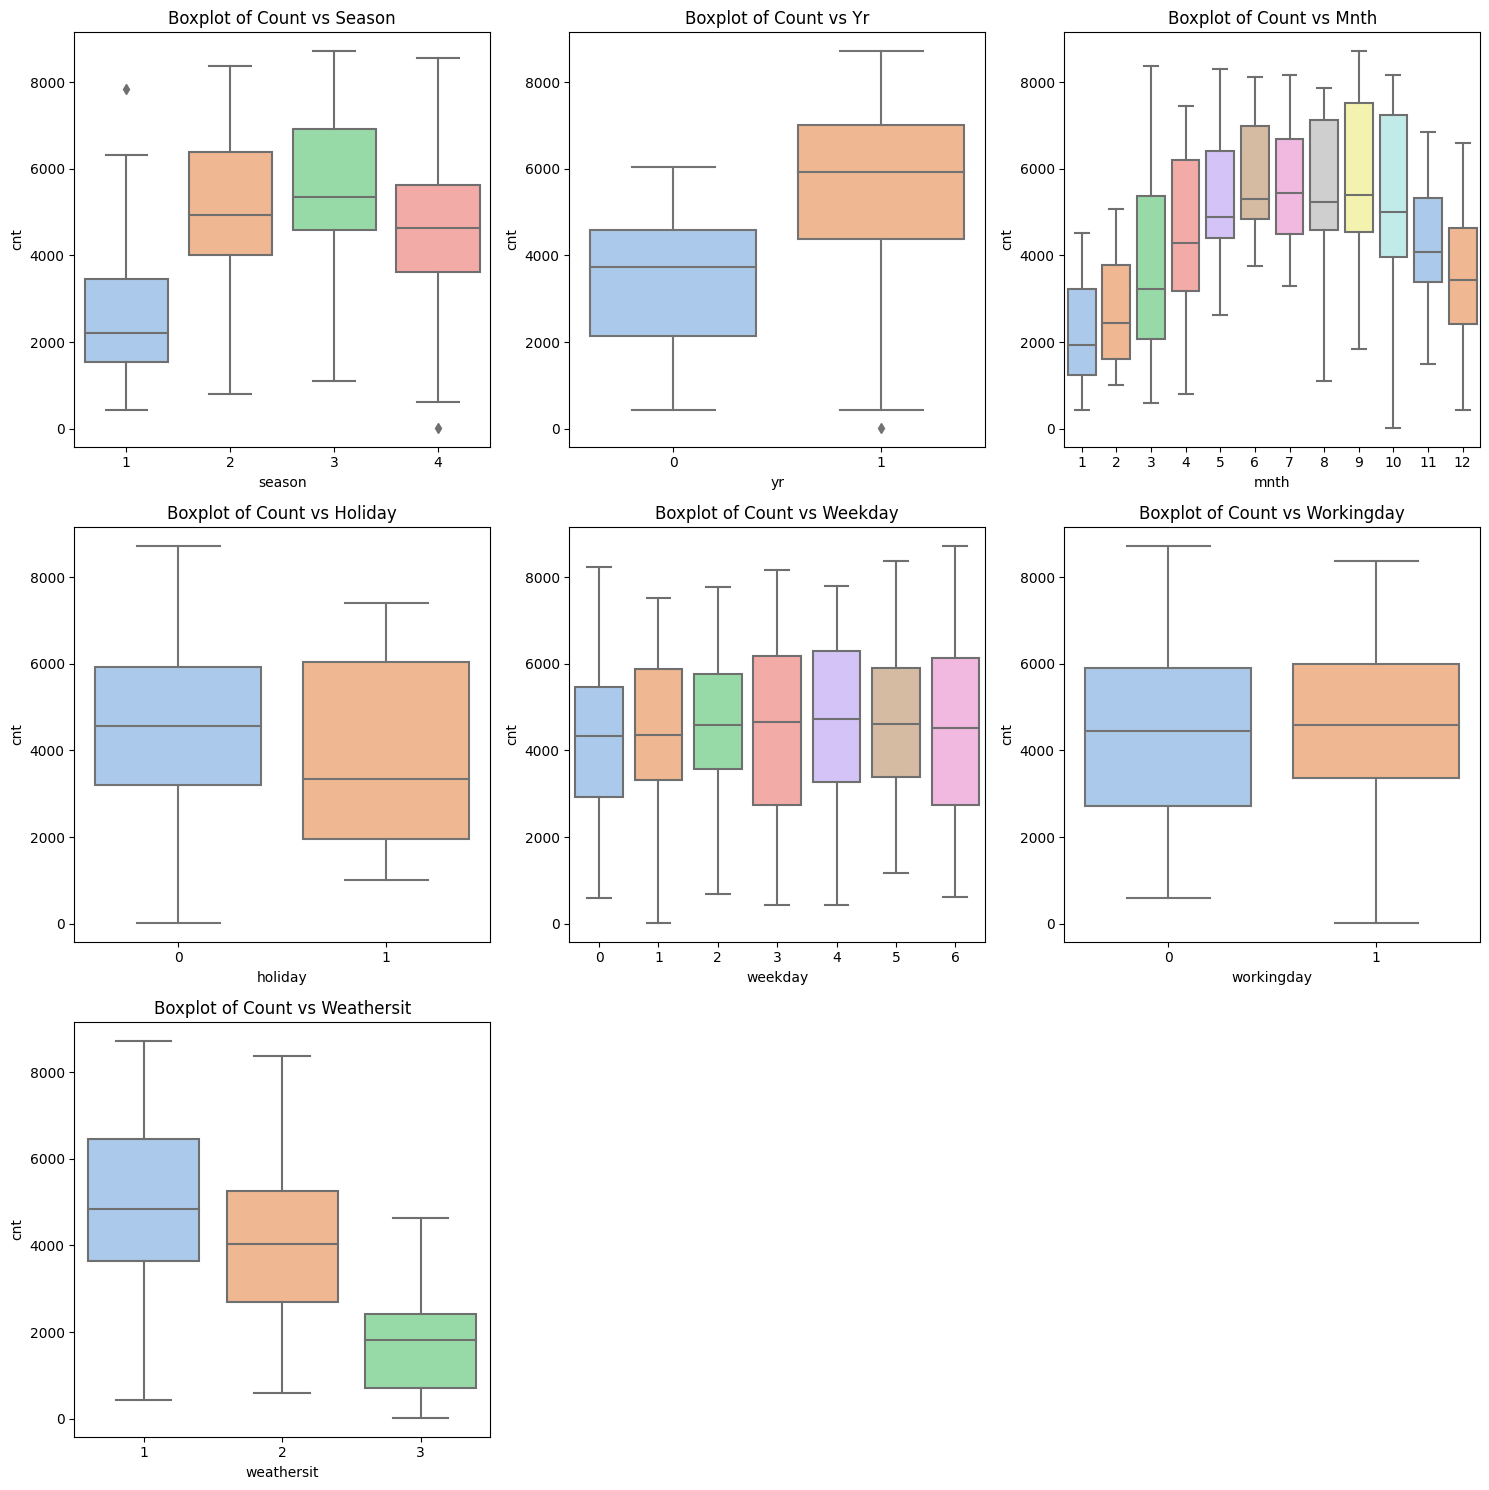

Average Demand per Season:
season
1    2608.411111
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Average Demand per Year:
yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64

Average Demand per Month:
mnth
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

Average Demand on Holidays vs Non-Holidays:
holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64



In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables for analysis
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Set a custom color palette
custom_palette = sns.color_palette("pastel")  # You can choose any Seaborn or custom palette

# Create a grid of box plots with the custom palette
plt.figure(figsize=(15, 15))

for i, var in enumerate(categorical_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=var, y='cnt', palette=custom_palette)  # Set the custom palette here
    plt.title(f'Boxplot of Count vs {var.capitalize()}')

plt.tight_layout()
plt.show()


# - Average demand per season
avg_demand_per_season = df.groupby('season')['cnt'].mean()

# - Average demand per year
avg_demand_per_year = df.groupby('yr')['cnt'].mean()

# - Average demand per month
avg_demand_per_month = df.groupby('mnth')['cnt'].mean()

# - Average demand on holidays vs. non-holidays
avg_demand_on_holidays = df.groupby('holiday')['cnt'].mean()

# Print the results
print(f'Average Demand per Season:\n{avg_demand_per_season}\n')
print(f'Average Demand per Year:\n{avg_demand_per_year}\n')
print(f'Average Demand per Month:\n{avg_demand_per_month}\n')
print(f'Average Demand on Holidays vs Non-Holidays:\n{avg_demand_on_holidays}\n')


##One-hot encoding the categorical variables with more than two categories

#Linear regression

In [204]:
##converting all the categorical variables to dummy variables
import pandas as pd

def one_hot_encode(df, columns, drop_first=True):
    return pd.get_dummies(data=df, columns=columns, drop_first=drop_first)

# Apply one-hot encoding to specific columns
categorical_columns = ["season", "mnth", "weekday", "weathersit"]
df = one_hot_encode(df, categorical_columns)



In [205]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,humidity,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,80.5833,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,69.6087,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,43.7273,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,59.0435,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,43.6957,0,...,0,0,0,0,1,0,0,0,0,0


In [206]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'humidity', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#first , splitting the entire dataset into training and testing dataset

In [207]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)

##Scaling the continuous numeric variables present in the training dataset

In [208]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define the numeric variables to be scaled
numeric_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']

# Apply MinMax scaling only to the specified columns
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])


In [209]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,humidity,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.639330,0.367133,0.605336,62.0417,0,...,1,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.470283,0.609320,70.9583,0,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.795461,0.554026,49.4583,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.466828,0.088253,76.2500,0,...,0,1,0,1,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.124127,0.862127,79.3750,0,...,0,0,0,0,1,0,0,0,1,0


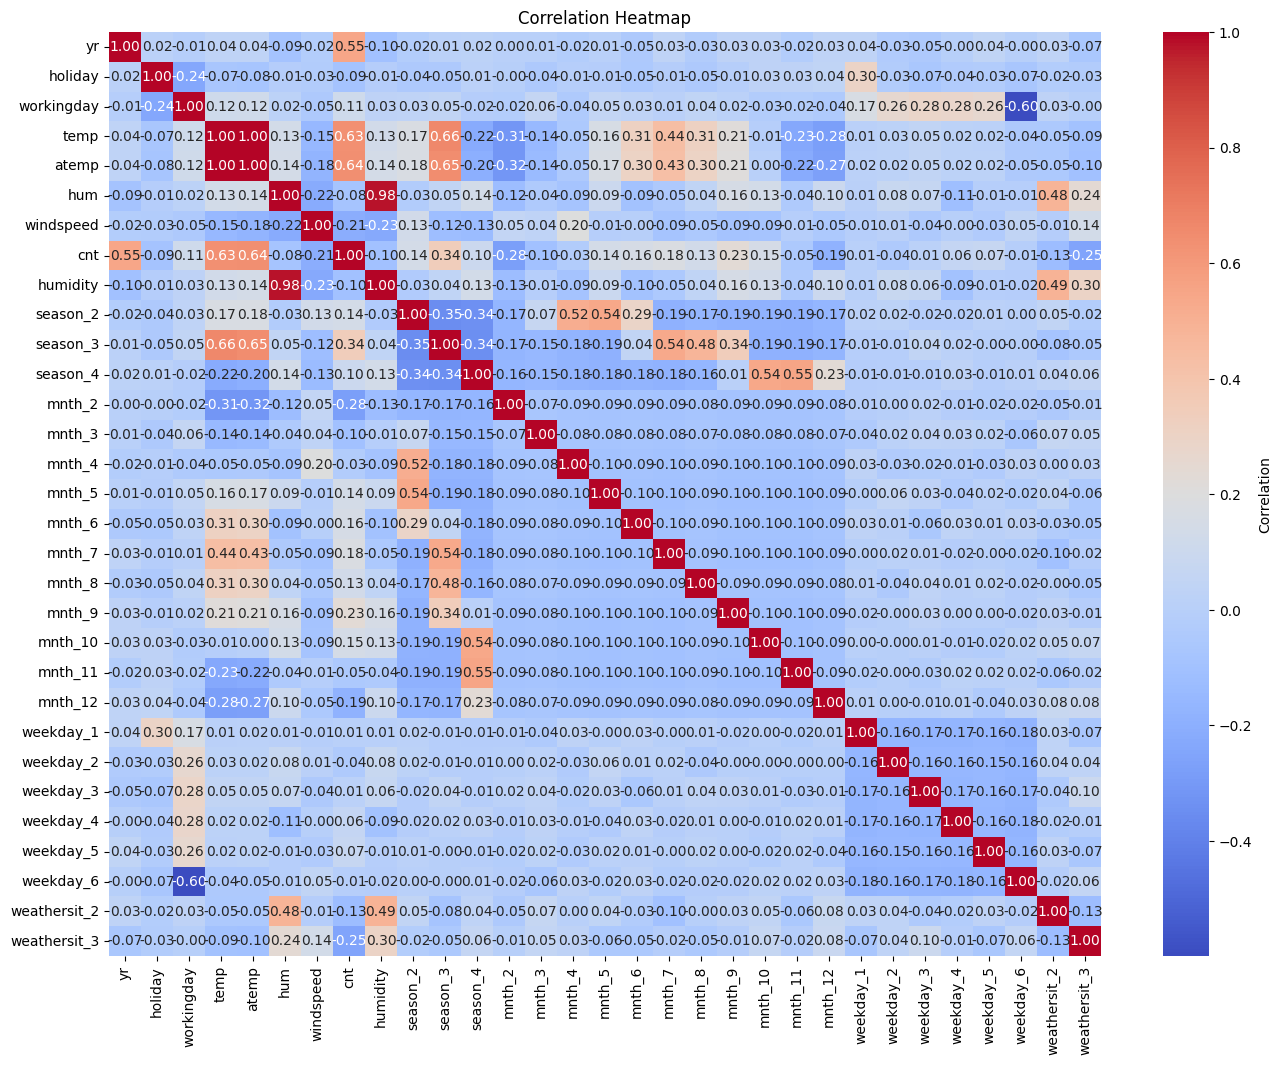

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(16, 12))

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Define a custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_palette,
    cbar_kws={'label': 'Correlation'},
)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [211]:
df_train.shape

(510, 31)

In [212]:
y_train = df_train.pop('cnt')
X_train = df_train

Use RFE to eliminate some columns

In [213]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize Linear Regression model
lm = LinearRegression()

# Fit RFE
rfe = RFE(lm, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

# Get selected features
selected_features = list(X_train.columns[rfe.support_])
print(selected_features)
# Fit Linear Regression with selected features
lm.fit(X_train[selected_features], y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))




['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_3']


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 14),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('humidity', False, 16),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 15),
 ('mnth_3', False, 7),
 ('mnth_4', False, 13),
 ('mnth_5', False, 10),
 ('mnth_6', False, 11),
 ('mnth_7', False, 8),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 9),
 ('mnth_11', False, 3),
 ('mnth_12', False, 4),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 6),
 ('weathersit_2', False, 5),
 ('weathersit_3', True, 1)]


 the logic to drop a variable is as follows:

####High - low
1.high p-value and low VIF
2.low p-value and high VIF
3.low p-value and low VIF

In [214]:
# Assuming df is your DataFrame
df = df.reset_index(drop=True)

In [215]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(X_train):
    # Create a copy of X_train without the index column
    df1 = X_train.copy().reset_index(drop=True)
    # Rest of your VIF calculation code remains the same
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print("")
    print(" --- Comparing VIF values --- ")
    print("")
    print(vif.sort_values(by='VIF',ascending=False))


In [216]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

        Features    VIF
1        holiday    inf
2     workingday    inf
9      weekday_1    inf
10     weekday_2    inf
11     weekday_3    inf
12     weekday_4    inf
13     weekday_5    inf
4            hum  11.76
3          atemp   7.75
5      windspeed   4.72
0             yr   2.04
6       season_2   1.65
7       season_4   1.59
8         mnth_9   1.22
14  weathersit_3   1.13


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [217]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe).fit()
lm_1.params

const           0.170648
yr              0.230405
holiday        -0.052697
workingday      0.020854
atemp           0.674184
hum            -0.276279
windspeed      -0.092164
season_2        0.089829
season_4        0.155097
mnth_9          0.111479
weekday_1      -0.017097
weekday_2      -0.021989
weekday_3       0.004350
weekday_4      -0.002448
weekday_5       0.005341
weathersit_3   -0.163614
dtype: float64

In [218]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     157.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          8.63e-172
Time:                        14:22:45   Log-Likelihood:                 449.74
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     495   BIC:                            -806.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1706      0.031      5.516   

In [219]:
X_train_rfe = X_train_rfe.drop(['weekday_3','weekday_4','weekday_5'], axis=1)

def get_vif(X_train):
    # Exclude the constant term from the DataFrame
    df1 = X_train.iloc[:, 1:]  # Exclude the first column (assuming it's the constant term)

    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)

    print("")
    print(" --- Comparing VIF values --- ")
    print("")

    print(vif.sort_values(by='VIF',ascending=False))


In [220]:
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

        Features    VIF
4            hum  11.66
3          atemp   7.74
5      windspeed   4.70
2     workingday   3.68
0             yr   2.03
6       season_2   1.65
7       season_4   1.59
9      weekday_1   1.48
10     weekday_2   1.32
1        holiday   1.25
8         mnth_9   1.22
11  weathersit_3   1.12


In [221]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe).fit()
lm_2.params

const           0.169647
yr              0.230482
holiday        -0.050551
workingday      0.023122
atemp           0.673934
hum            -0.274430
windspeed      -0.092256
season_2        0.089850
season_4        0.154852
mnth_9          0.111426
weekday_1      -0.019372
weekday_2      -0.024305
weathersit_3   -0.163883
dtype: float64

In [222]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          5.31e-174
Time:                        14:22:50   Log-Likelihood:                 449.62
No. Observations:                 510   AIC:                            -873.2
Df Residuals:                     497   BIC:                            -818.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1696      0.031      5.505   

In [223]:
X_train_rfe = X_train_rfe.drop( ['holiday', 'weekday_1','weekday_2'], axis=1)

In [224]:
def get_vif(X_train):
    # Exclude the constant term from the DataFrame
    df1 = X_train.iloc[:, 1:]  # Exclude the first column (assuming it's the constant term)

    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)

    print("")
    print(" --- Comparing VIF values --- ")
    print("")

    print(vif.sort_values(by='VIF',ascending=False))

In [225]:
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

       Features    VIF
3           hum  11.43
2         atemp   7.72
4     windspeed   4.70
1    workingday   2.97
0            yr   2.03
5      season_2   1.65
6      season_4   1.59
7        mnth_9   1.22
8  weathersit_3   1.11


In [226]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     240.9
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.66e-175
Time:                        14:22:54   Log-Likelihood:                 444.79
No. Observations:                 510   AIC:                            -869.6
Df Residuals:                     500   BIC:                            -827.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1665      0.031      5.421   

In [227]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [228]:
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

       Features   VIF
2         atemp  4.88
3     windspeed  3.82
1    workingday  2.84
0            yr  2.01
4      season_2  1.64
5      season_4  1.39
6        mnth_9  1.21
7  weathersit_3  1.07


In [229]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          2.10e-163
Time:                        14:23:02   Log-Likelihood:                 413.44
No. Observations:                 510   AIC:                            -808.9
Df Residuals:                     501   BIC:                            -770.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0206      0.021     -0.959   

In [230]:
X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [231]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          7.81e-164
Time:                        14:23:06   Log-Likelihood:                 411.57
No. Observations:                 510   AIC:                            -807.1
Df Residuals:                     502   BIC:                            -773.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0483      0.016     -3.025   

In [232]:
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

       Features   VIF
2         atemp  3.99
1    workingday  2.72
0            yr  1.92
3      season_2  1.59
4      season_4  1.36
5        mnth_9  1.21
6  weathersit_3  1.03


##we can see that p value of all variables are less than 0.05 and VIF of all variables less than 5. Hence , multicollinearity is eliminated from our model.



##**Coeffecient values :**

const= -0.0483
yr =0.2371
working day= 0.0211
atemp= 0.6625
season_2= 0.0829
season_4= 0.1462
mnth_9 =0.0956
weathersit_3 =-0.2315


The equation of best fitted surface based on model: cnt = -0.0483 + (yr × 0.2371) + (workingday x 0.0211) + (atemp * 6625 )  + (season_2 * 0.0829) + (season_4 * 0.1462) + (mnth_9 *0.0956) + (weathersit_3 * -0.2315)

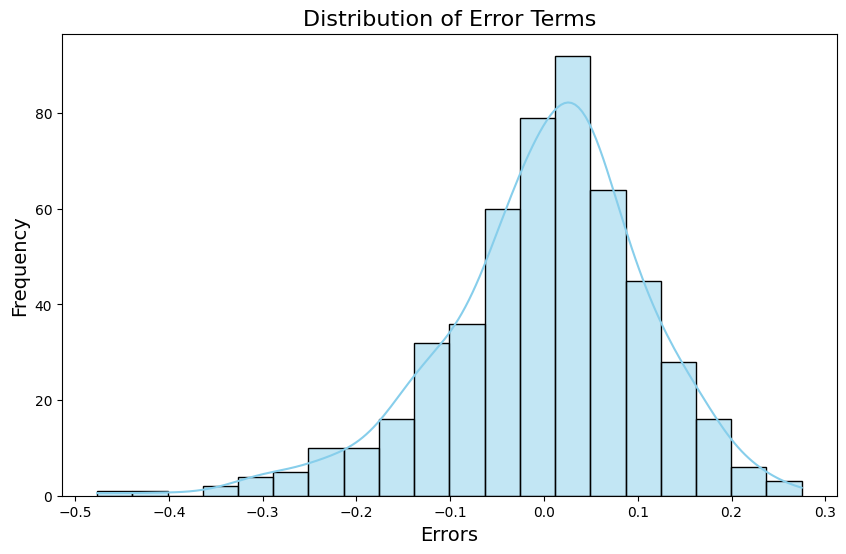

In [233]:
# Predicting the values of the dependent variable 'cnt' using the trained model 'lm'
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = lm_5.predict(X_train_sm)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotting the histogram of the error terms
plt.figure(figsize=(10, 6))
sns.histplot((y_train - y_train_pred), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Error Terms', fontsize=16)
plt.xlabel('Errors', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


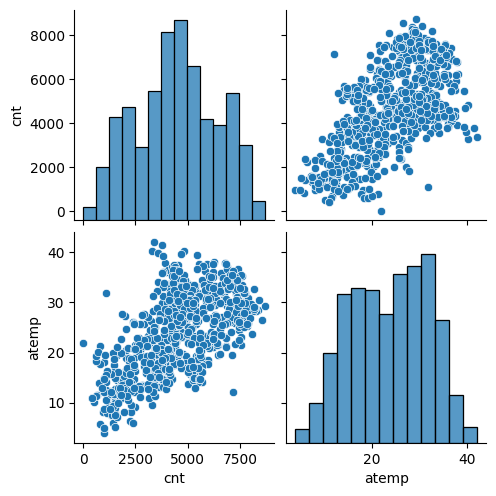

In [234]:
col_names = ['cnt','atemp']

sns.pairplot(df, vars = col_names)
plt.show()

In [235]:
get_vif(X_train_rfe)


 --- Comparing VIF values --- 

       Features   VIF
2         atemp  3.99
1    workingday  2.72
0            yr  1.92
3      season_2  1.59
4      season_4  1.36
5        mnth_9  1.21
6  weathersit_3  1.03


In [236]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,humidity,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.536771,0.518248,0.473763,0.848606,50.2917,1,...,0,0,0,0,0,0,0,1,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.538481,0.526017,81.8750,1,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.433563,0.350115,62.3750,0,...,0,0,0,0,0,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.069953,0.318363,75.7500,0,...,0,1,0,0,0,1,0,0,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.486026,0.833877,49.2917,1,...,0,0,0,0,0,1,0,0,0,0


In [237]:
y_test = df_test.pop('cnt')
X_test = df_test

In [238]:
X_train_sm.head()

,const,yr,workingday,atemp,season_2,season_4,mnth_9,weathersit_3
683,1.0,1,1,0.322150,0,1,0,0
645,1.0,1,0,0.404998,0,1,0,0
163,1.0,0,1,0.685963,1,0,0,0
360,1.0,0,1,0.326273,0,0,0,0
640,1.0,1,1,0.682653,0,1,0,0


In [239]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'season_2', 'season_4', 'mnth_9',
       'weathersit_3'],
      dtype='object')

In [241]:
X_train_sm = X_train_sm.drop('const', axis=1)

In [247]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = df_test[X_train_sm.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()


,const,yr,workingday,atemp,season_2,season_4,mnth_9,weathersit_3
468,1.0,1,0,0.536771,1,0,0,0
148,1.0,0,0,0.704203,1,0,0,0
302,1.0,0,0,0.317998,0,1,0,0
355,1.0,0,1,0.455552,0,0,0,0
515,1.0,1,1,0.724915,1,0,0,0


Text(0, 0.5, 'y_pred')

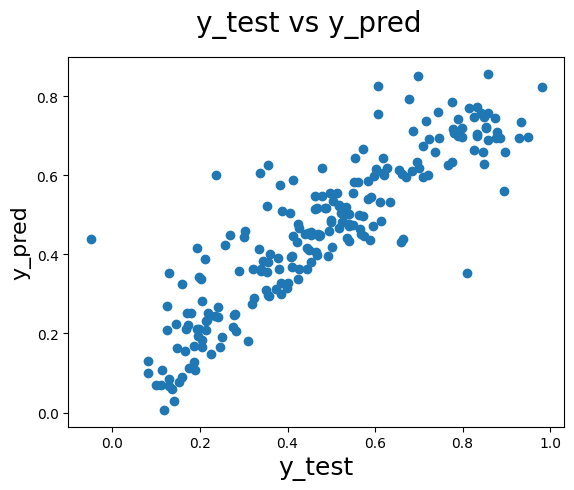

In [248]:
# Making predictions
y_pred = lm_5.predict(X_test_new)  # this is to predict the cnt ie., demand for bike
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

<ipython-input-249-a6e259f6b331>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

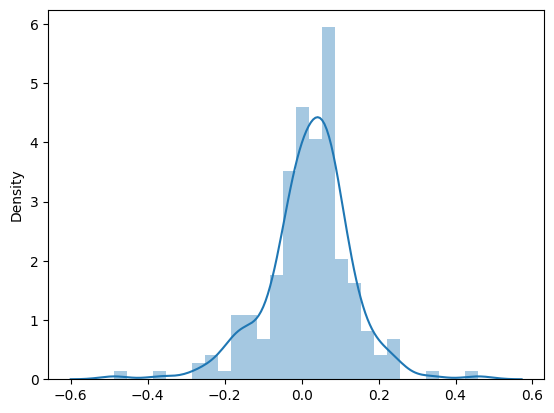

In [249]:
res = y_test - y_pred
sns.distplot(res)

In [250]:
from sklearn.metrics  import r2_score

r2_score(y_true = y_test, y_pred = y_pred)

0.767850523764988

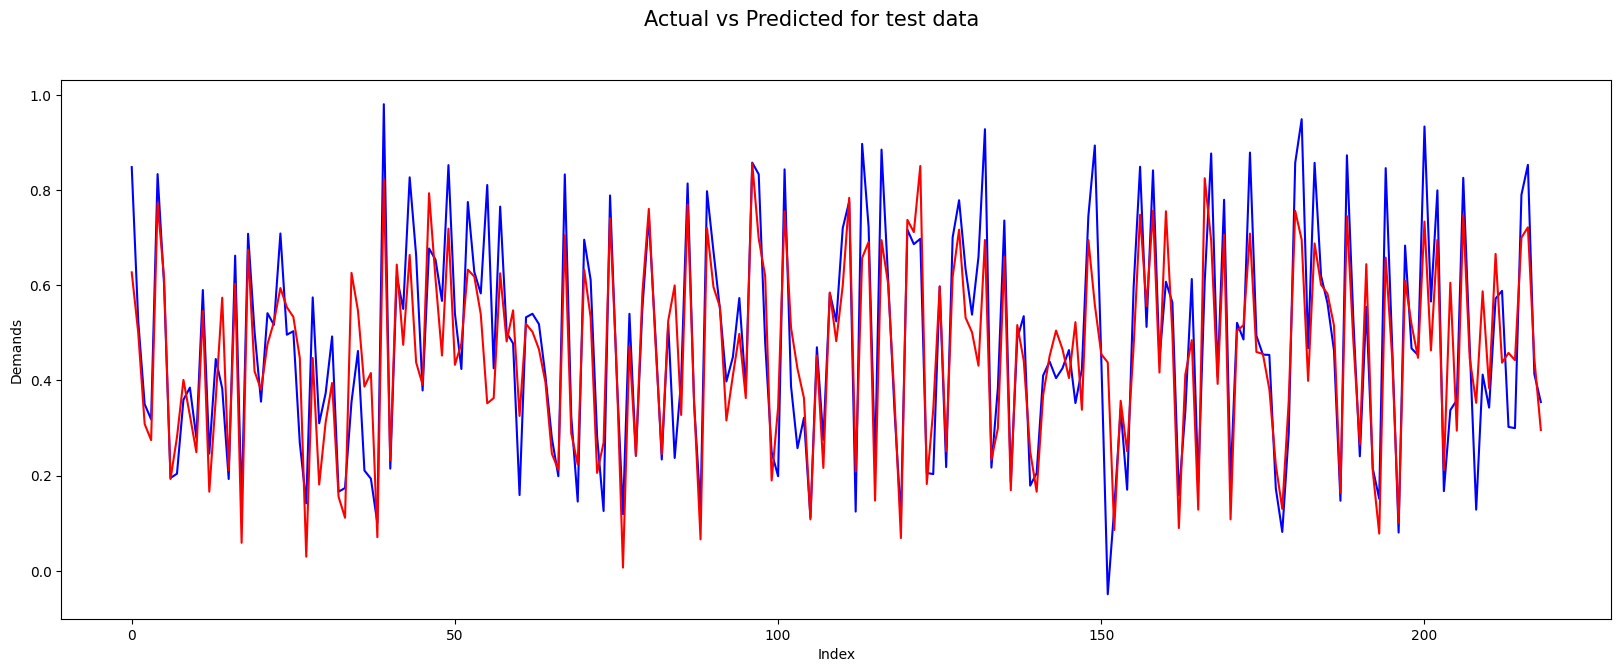

In [254]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_test, color="blue")
plt.plot(c,y_pred, color="red")
plt.suptitle('Actual vs Predicted for test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

##Final Result Comparison
Train R^2 :0.787 Train Adjusted R^2 :0.784

Test R^2 :0.767 Test

This seems to be a really good model that can very well 'Generalize' various datasets.

FINAL REPORT
As per our final Model, the top 5 predictor variables that influences the bike booking are:
The equation of best fitted surface based on model: cnt = -0.0483 + (yr × 0.2371) + (workingday x 0.0211) + (atemp * 6625 )  + (season_2 * 0.0829) + (season_4 * 0.1462) + (mnth_9 *0.0956) + (weathersit_3 * -0.2315)
**Variable	Coefficient	Description**
atemp	0.6625	Indicates that a unit increase in temp variable increases the bike hire numbers by this many units
yr	0.2371	Indicates that a unit increase in yr variable increases the bike hire numbers by this many units
weathersit_3	-0.2315	Indicates that a unit increase in bad weather situation( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) variable decreases the bike hire numbers by this many units
season_4 0.1462 Indicates that a unit increase in season_4(winter) variable increases  the bike hire numbers by this many units
season_2 0.0829	Indicates that a unit increase in season_2(summer) variable increases  the bike hire numbers by this many units
Other fields to predict the demand for bikes.

working day (0.0211)
month_9(0.0956)